In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import cv2
img = cv2.imread("input/Sample.png")
img.shape

(255, 242, 3)

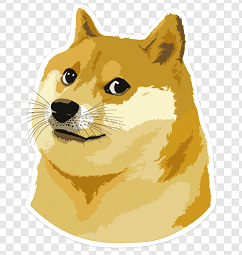


In [3]:
# pop-up
cv2.imshow('input/Sample.png', img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

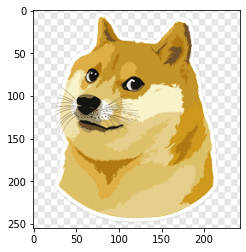

In [4]:
# 使用matplotlib顯示圖片
from matplotlib import pyplot as plt
plt.imshow(img[:,:,::-1]) # opencv是用BGR的順序，因此需要調換
plt.show()

In [5]:
# method1 .使用cv2轉換
img_gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

In [6]:
# method2 .使用 RGB 轉換 (R*0.299 + G*0.587 + B*0.114)
img_gray2 = np.array((img[:,:,0]*0.299 + img[:,:,0]*0.587 + img[:,:,0]*0.114), dtype="uint8")

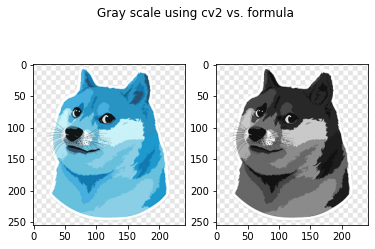

In [7]:
# Gray scale
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gray scale using cv2 vs. formula')
ax1.imshow(img_gray, cmap = 'gray')
ax2.imshow(img_gray2, cmap = 'gray')
plt.show()

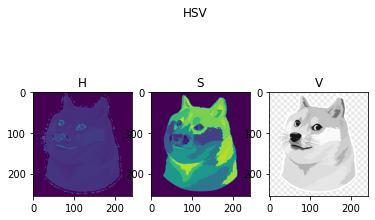

In [8]:
hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 轉換成HSV格式
h,s,v = cv2.split(hsv) # 分割成三個通道

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)

fig.suptitle('HSV')
ax1.imshow(h)
ax1.set_title("H")
ax2.imshow(s)
ax2.set_title("S")
ax3.imshow(v,cmap="gray")
ax3.set_title("V")
plt.show()

In [9]:
np.ones((5,5))/25

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

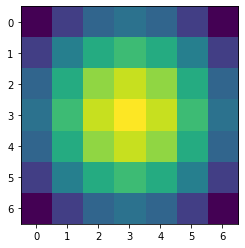

In [10]:
import numpy as np
x, y = np.meshgrid(np.linspace(-1,1,7), np.linspace(-1,1,7)) # 建立二維
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
kernel = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) ) # 高斯分佈公式
kernel /= sum(sum(kernel)) #讓總和為1
plt.imshow(kernel)
plt.show()

## rotate90

In [11]:
def rotate90(grid):
    """Rotates a grid 90 degrees
    Args:
        grid (list): a 2d list representing a grid
    Returns:
        grid (list): rotated copy of a 2d grid
    """
    return list(zip(*grid[::-1]))

def print2DGrid(grid):
    """Prints a 2D grid
    Args:
        grid (list): 2D grid
    Returns:
        None
    """
    for row in range(len(grid)):
        for col in range(len(grid[row])):
            print(grid[row][col], end='')

        print()

if __name__ == "__main__":
    grid = [['.', '.', '.', '.', '.', '.'],
            ['.', 'O', 'O', '.', '.', '.'],
            ['O', 'O', 'O', 'O', '.', '.'],
            ['O', 'O', 'O', 'O', 'O', '.'],
            ['.', 'O', 'O', 'O', 'O', 'O'],
            ['O', 'O', 'O', 'O', 'O', '.'],
            ['O', 'O', 'O', 'O', '.', '.'],
            ['.', 'O', 'O', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.']]
    gridRotated = rotate90(grid)
    print2DGrid(gridRotated)

..OO.OO..
.OOOOOOO.
.OOOOOOO.
..OOOOO..
...OOO...
....O....


In [12]:
import cv2

camera = cv2.VideoCapture(0)
for i in range(10):
    return_value, image = camera.read()
    print(return_value, image.shape)
    cv2.imwrite('photo'+str(i)+'.png', image)
del(camera)

True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)
True (1080, 1920, 3)


# <font style="color:black">Arithmatic Operations</font>
Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover Arithmetic Operations like addition and multiplication.

In [13]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image

img_bgr = cv2.imread("New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display 18x18 pixel image.
Image(filename='New_Zealand_Coast.jpg')


[ WARN:0@721.518] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('New_Zealand_Coast.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## Addition or Brightness
The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

In [ ]:
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

## Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image. 

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

In [ ]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

### <font color="green">What happened?</font>
Can you see the weird colors in some areas of the image after multiplication?

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

In [ ]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

# Basic Image Manipulations

In this notebook we will cover how to perform image transformations including:

* Accessing and manipulating images pixels 
* Image resizing
* Cropping
* Flipping

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')
print(cb_img)

## Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed. 

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

In [ ]:
# print the first pixel of the first black box
print(cb_img[0,0])
# print the first white pixel to the right of the first black box
print(cb_img[0,6])

## <font style="color:black">Modifying Image Pixels</font>
We can modify the intensity values of pixels in the same manner as described above.

In [ ]:
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

# <font style="color:black">Basic Image Enhancement Using Bitwise Operations</font>
Image Processing techniques take advantage of differnet logical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic logical operations like AND and OR operations. In this notebook we will take a look at some of the fundamental bitwise operations often used in computer vision pipelines.


In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image


## Bitwise Operations

### <font style="color:rgb(8,133,37)">Function Syntax</font>

Example API for `cv2.bitwise_and()`. Others include: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.
2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html
https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14

In [ ]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec,cmap='gray')
plt.subplot(122);plt.imshow(img_cir,cmap='gray')
print(img_rec.shape)

### <font color="green">Bitwise AND Operator </font>

In [ ]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

### <font color="green">Bitwise OR Operator </font>

In [ ]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

### <font color="green">Bitwise XOR Operator </font>

In [ ]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

## Application: Logo Manipulation

In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image.

### <font color="green">Read Foreground image</font>

In [ ]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

### <font color="green">Read Background image</font>

In [ ]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb) 
print(img_background_rgb.shape)

### <font color="green">Create Mask for original Image</font>

In [ ]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

### <font color="green">Invert the Mask </font>

In [ ]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

### <font color="green">Apply background on the Mask</font>

In [ ]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### <font color="green">Isolate foreground from image</font>

In [ ]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### <font color="green">Result: Merge Foreground and Background</font>

In [ ]:
# Add the two previous results obtain the final result
result = cv2.add(img_background,img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])

## contadormonedas

In [ ]:
from cv2 import cv2
import numpy as np

valorGauss=1
valorKernel=7
original=cv2.imread('monedas.jpg')
gris=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
gauss=cv2.GaussianBlur(gris, (valorGauss,valorGauss), 0)
canny=cv2.Canny(gauss, 60,100)
kernel=np.ones((valorKernel,valorKernel),np.uint8)
cierre=cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

contornos, jerarquía=cv2.findContours(cierre.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("monedas encontradas: {}".format(len(contornos)))
cv2.drawContours(original, contornos, -1, (0,0,255),2)
#Mostrar resultados
cv2.imshow("Grises",gris)
cv2.imshow("gauss",gauss)
cv2.imshow("canny",canny)
cv2.imshow("cierre",cierre)

cv2.imshow("Resultado", original)
cv2.waitKey(0)

In [ ]:
from cv2 import cv2
import numpy as np
def ordenarpuntos(puntos):
    n_puntos=np.concatenate([puntos[0],puntos[1],puntos[2],puntos[3]]).tolist()
    y_order=sorted(n_puntos,key=lambda n_puntos:n_puntos[1])
    x1_order=y_order[:2]
    x1_order=sorted(x1_order,key=lambda x1_order:x1_order[0])
    x2_order=y_order[2:4]
    x2_order=sorted(x2_order,key=lambda x2_order:x2_order[0])
    return [x1_order[0],x1_order[1],x2_order[0],x2_order[1]]
def alineamiento(imagen,ancho,alto):
    imagen_alineada=None
    grises=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    tipoumbral,umbral=cv2.threshold(grises, 150,255, cv2.THRESH_BINARY)
    cv2.imshow("Umbral", umbral)
    contorno=cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    contorno=sorted(contorno,key=cv2.contourArea,reverse=True)[:1]
    for c in contorno:
        epsilon=0.01*cv2.arcLength(c, True)
        approximacion=cv2.approxPolyDP(c, epsilon, True)
        if len(approximacion)==4:
            puntos=ordenarpuntos(approximacion)
            puntos1=np.float32(puntos)
            puntos2=np.float32([[0,0],[ancho,0],[0,alto],[ancho,alto]])
            M = cv2.getPerspectiveTransform(puntos1, puntos2)
            imagen_alineada=cv2.warpPerspective(imagen, M, (ancho,alto))
    return imagen_alineada
capturavideo= cv2.VideoCapture(0)

while True:
    tipocamara,camara=capturavideo.read()
    if tipocamara==False:
        break
    imagen_A6=alineamiento(camara,ancho=480,alto=640)
    if imagen_A6 is not None:
        puntos=[]
        imagen_gris=cv2.cvtColor(imagen_A6,cv2.COLOR_BGR2GRAY)
        blur=cv2.GaussianBlur(imagen_gris,(5,5),1)
        _,umbral2=cv2.threshold(blur,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
        cv2.imshow("Umbral",umbral2)
        contorno2=cv2.findContours(umbral2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
        cv2.drawContours(imagen_A6, contorno2, -1, (255,0,0),2)
        suma1=0.0
        suma2=0.0
        for c_2 in contorno2:
            area=cv2.contourArea(c_2)
            Momentos = cv2.moments(c_2)
            if(Momentos["m00"]==0):
                Momentos["m00"]=1.0
            x=int(Momentos["m10"]/Momentos["m00"])
            y=int(Momentos["m01"]/Momentos["m00"])

            if area<9300 and area>8000:
                font=cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(imagen_A6, "S/. 0.20",(x,y) , font, 0.75, (0,255,0),2)
                suma1=suma1+0.2
            
            if area<7800 and area>6500:
                font=cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(imagen_A6, "S/. 0.10",(x,y) , font, 0.75, (0,255,0),2)
                suma2=suma2+0.1
        total=suma1+suma2
        print("Sumatoria total en Centimos:",round(total,2))
        cv2.imshow("Imagen A6", imagen_A6)
        cv2.imshow("camara", camara)
    if cv2.waitKey(1) == ord('s'):
        break
capturavideo.release()
cv2.destroyAllWindows()

In [ ]:
from cv2 import cv2
imagen=cv2.imread('contorno.jpg')
cv2.imshow('imagen',imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import sys

s = 0
if len(sys.argv) > 1:
    s = sys.argv[1]

source = cv2.VideoCapture(s)

win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

net = cv2.dnn.readNetFromCaffe("deploy.prototxt",
                               "res10_300x300_ssd_iter_140000_fp16.caffemodel")
# Model parameters
in_width = 300
in_height = 300
mean = [104, 117, 123]
conf_threshold = 0.7

while cv2.waitKey(1) != 27:
    has_frame, frame = source.read()
    if not has_frame:
        break
    frame = cv2.flip(frame,1)
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(frame, 1.0, (in_width, in_height), mean, swapRB = False, crop = False)
    # Run a model
    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x_left_bottom = int(detections[0, 0, i, 3] * frame_width)
            y_left_bottom = int(detections[0, 0, i, 4] * frame_height)
            x_right_top = int(detections[0, 0, i, 5] * frame_width)
            y_right_top = int(detections[0, 0, i, 6] * frame_height)

            cv2.rectangle(frame, (x_left_bottom, y_left_bottom), (x_right_top, y_right_top), (0, 255, 0))
            label = "Confidence: %.4f" % confidence
            label_size, base_line = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            cv2.rectangle(frame, (x_left_bottom, y_left_bottom - label_size[1]),
                                (x_left_bottom + label_size[0], y_left_bottom + base_line),
                                (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (x_left_bottom, y_left_bottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)


In [ ]:
import cv2
dt = r"anaconda3\Lib\site-packages\cv2\..."
FaceRecog = cv2.CascadeClassifier(dt)

In [ ]:
img = cv2.imread('peoples.jpg')
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
fes = FaceRecog.detectMultiScale(gimg, 1.3,5)
for (x,y,w,h) in fes:
    img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),3)
cv2.imwrite('Detected_Faces.png',img)

In [ ]:
#Dr.Xavier Chelladurai
#12 June 2021
#Program to load a color picture and find shape
import face_recognition
photo_xavi = face_recognition.load_image_file('./xavier/xavier01.png','RGB')
photo_alwy = face_recognition.load_image_file('./alwyn/alwyn01.jpeg','RGB')
photo_arun = face_recognition.load_image_file('./arun/arun01.jpeg')
print("The shapes of the Color photo files are...")
print("Xavier Photo....",photo_xavi.shape)
print("Alwyn Photo.....", photo_alwy.shape)
print("Arun Photo......", photo_arun.shape)

In [ ]:
import cv2 as cv
capturaVideo=cv.VideoCapture(0)
if not capturaVideo.isOpened():
    print("No se encontro una camara")
    exit()
while True:
    tipocamara,Camara=capturaVideo.read()
    grises=cv.cvtColor(Camara, cv.COLOR_BGR2GRAY)

    cv.imshow("En vivo",grises)
    if cv.waitKey(1)==ord("q"):
        break
capturaVideo.release()
cv.destroyAllWindows()